# Heroes of Pymoli Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'purchase_data.json'
purchase_data_df = pd.read_json(path)
purchase_data_df.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


In [3]:
num_players = len(purchase_data_df['SN'].unique())
num_players

573

In [4]:
unique_items = len(purchase_data_df['Item ID'].unique())
unique_items

183

In [5]:
avg_purchase_price = round(purchase_data_df['Price'].mean(), 2)
avg_purchase_price

2.93

In [6]:
num_purchases = purchase_data_df['Price'].size
num_purchases

780

In [7]:
tot_revenue = purchase_data_df['Price'].sum()
tot_revenue

2286.33

# Gender Demographics:


## What I need to know:

1. percentage and count of Male
2. percentage and count of Female
3. percentage and count of other / Non-Disclosed

## what I know:

1. there are more than one representation of some but not all players. the max representation is 5 times.
2. Collumn Gender contains the information needed however it has duplicates.
3. there are 573 unique players.
4. there are 780 rows in the dataframe.

## what I need to do:

1. drop the rows with duplicate players.
2. make new dataframe
3. groupby Gender
4. count gender groups
5. divide counts by total number of players to get percentages.

In [8]:
dropped_duplicate_SN = purchase_data_df.drop_duplicates(subset='SN',keep='first')
gender_grouped_df = dropped_duplicate_SN.groupby('Gender').count()
gender_renamed = gender_grouped_df.rename(index=str, columns={'Age': 'Gender Count', 'Item ID': 'Gender Percentage'})
gender_renamed['Gender Percentage'] = round((gender_renamed.loc[:,'Gender Percentage'] / num_players) * 100, 2)
gender_count = gender_renamed.loc[:, ['Gender Count', 'Gender Percentage']]
gender_count

,Gender Count,Gender Percentage
Gender,,
Female,100,17.45
Male,465,81.15
Other / Non-Disclosed,8,1.40


# Gender Count:

Text(0,0.5,'')

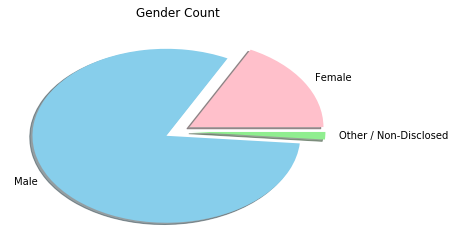

In [80]:
ax = plt.subplot()
gender_count['Gender Count'].plot(kind='pie', legend=False, ax=ax, shadow=True, explode=(0.1, 0.1, 0.1), colors=['pink', 'skyblue', 'lightgreen'])
ax.set_title('Gender Count')
ax.set_ylabel('')

# Gender Percentages

Text(0,0.5,'')

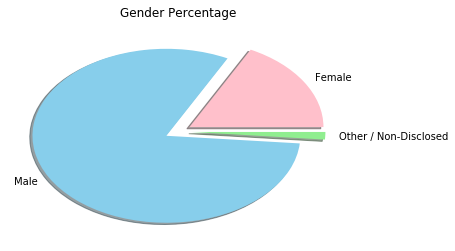

In [79]:
ax1 = plt.subplot()
gender_count['Gender Percentage'].plot(kind='pie', legend=False, ax=ax1, shadow=True, explode=(0.1, 0.1, 0.1), colors=['pink', 'skyblue', 'lightgreen'])
ax1.set_title('Gender Percentage')
ax1.set_ylabel('')

In [11]:
gender_groupby = purchase_data_df.groupby('Gender')

# Purchase Count by Gender:

In [12]:
count_df = gender_groupby.count()
count = count_df.loc[:,'Age']
purchase_count_df = count.to_frame()
purchase_count_df = purchase_count_df.rename(index=str, columns={'Age': 'Purchase Count'})
purchase_count_df
#purchase_count_df = count_df(index=str, columns={'Age': 'Purchase Count'})

,Purchase Count
Gender,
Female,136
Male,633
Other / Non-Disclosed,11


Text(0,0.5,'')

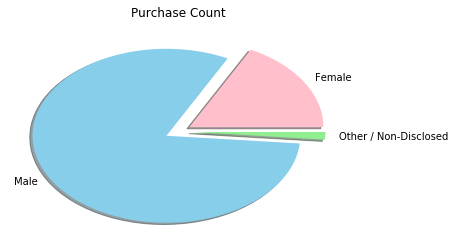

In [78]:
ax2 = plt.subplot()
purchase_count_df['Purchase Count'].plot(kind='pie', legend=False, ax=ax2, shadow=True, explode=(0.1, 0.1, 0.1), colors=['pink', 'skyblue', 'lightgreen'])
ax2.set_title('Purchase Count')
ax2.set_ylabel('')

# Average Price by Gender:

In [14]:
avg_df = gender_groupby.mean()
avg = avg_df.loc[:,'Price']
avg_price_df = avg.to_frame()
avg_price_df = avg_price_df.rename(index=str, columns={'Price': 'Avg Purchase Price'})
avg_price_df

,Avg Purchase Price
Gender,
Female,2.815515
Male,2.950521
Other / Non-Disclosed,3.249091


Text(0,0.5,'Average Price')

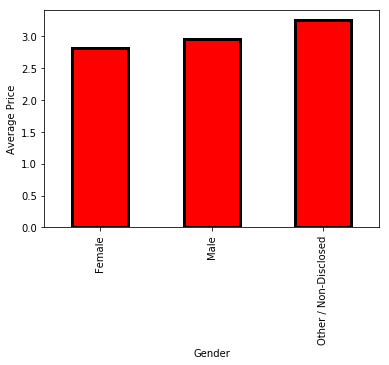

In [74]:
ax3 = plt.subplot()
avg_price_df.plot(kind='bar', legend=False, ax=ax3, color='r', edgecolor='k', linewidth=3)
ax3.set_ylabel('Average Price')

# Total Purchase Value by Gender:

In [16]:
total_df = gender_groupby.sum()
total = total_df.loc[:,'Price']
total_price_df = total.to_frame()
total_price_df = total_price_df.rename(index=str, columns={'Price': 'Total Purchase Value'})
total_price_df

,Total Purchase Value
Gender,
Female,382.91
Male,1867.68
Other / Non-Disclosed,35.74


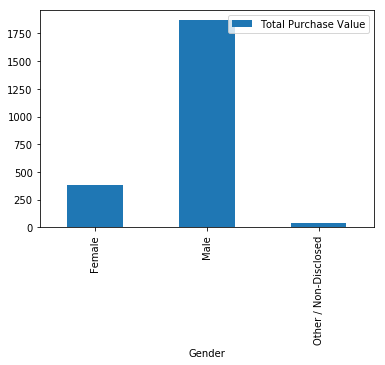

In [17]:
total_price_df.plot.bar()

# Normalized Totals by Gender:

In [18]:
normalized_price_df = total_price_df.assign()
normalized_price_df.iloc[0,0] = normalized_price_df.iloc[0,0] / purchase_count_df.iloc[0,0]
normalized_price_df.iloc[1,0] = normalized_price_df.iloc[1,0] / purchase_count_df.iloc[1,0]
normalized_price_df.iloc[2,0] = normalized_price_df.iloc[2,0] / purchase_count_df.iloc[2,0]
normalized_price_df.rename(index=str, columns={'Total Purchase Value': 'Normalized Purchase Value'}, inplace=True)
normalized_price_df

,Normalized Purchase Value
Gender,
Female,2.815515
Male,2.950521
Other / Non-Disclosed,3.249091


# Age Demographics:

# Age Data Binning:

1. Age data is binned into 9 bins
2. bins are: (5,10], (10,15], (15,20], (20,25], (25,30], (30,35], (35,40], (40,45], (45,50]
3. Age bins are assigned label and added to the column 'Age Range'

In [71]:
print(purchase_data_df['Age'].min())
bin = np.arange(5,55,5)
labels = ['5-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45','46-50']
purchase_data_df['Age Range'] = pd.cut(purchase_data_df['Age'], bin, labels=labels) 
purchase_data_df.sort_values('Age', ascending=False).head(10)


7


,Age,Gender,Item ID,Item Name,Price,SN,Age Range
264,45,Male,124,Venom Claymore,2.72,Marassaya49,41-45
644,43,Male,57,"Despair, Favor of Due Diligence",3.81,Raesurdil91,41-45
319,42,Male,110,Suspension,2.11,Lisista27,41-45
212,40,Male,111,Misery's End,2.91,Yarmol79,36-40
478,40,Male,168,"Sun Strike, Jaws of Twisted Visions",2.64,Yaralnura48,36-40
14,40,Male,44,Bonecarvin Battle Axe,2.46,Sundast29,36-40
179,40,Male,70,Hope's End,3.89,Chanosiaya39,36-40
357,40,Male,65,Conqueror Adamantite Mace,1.96,Sundast29,36-40
186,40,Male,144,Blood Infused Guardian,2.86,Chanosiaya39,36-40
238,40,Female,49,"The Oculus, Token of Lost Worlds",4.23,Chamadar27,36-40


# Grouping by Age Range:

In [20]:
age_range_groupby = purchase_data_df.groupby('Age Range')

# Purchase Count by Age Range:

In [21]:
age_range_count = age_range_groupby.count()
age_range_purchase_count = age_range_count['Item ID'].to_frame()
age_range_purchase_count = age_range_purchase_count.rename(index=str, columns={'Item ID': 'Purchase Count'})
age_range_purchase_count

,Purchase Count
Age Range,
5-10,32
11-15,78
16-20,184
21-25,305
26-30,76
31-35,58
36-40,44
41-45,3
46-50,0


Text(0,0.5,'')

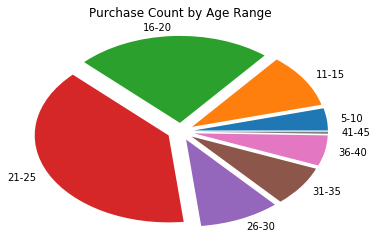

In [70]:
ax5 = plt.subplot()
age_range_purchase_count['Purchase Count'].plot(kind='pie', ax=ax5, explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
ax5.set_title('Purchase Count by Age Range')
ax5.set_ylabel('')

# Average Purchase Price by Age Range:

In [23]:
age_range_avg = age_range_groupby.mean()
age_range_avg_price = age_range_avg['Price'].to_frame()
age_range_avg_price = age_range_avg_price.rename(index=str, columns={'Price':'Average Purchase Price'})
age_range_avg_price

,Average Purchase Price
Age Range,
5-10,3.019375
11-15,2.873718
16-20,2.873587
21-25,2.959377
26-30,2.892368
31-35,3.073448
36-40,2.897500
41-45,2.880000
46-50,NaN


Text(0.5,1,'Average Purchase Price by Age Range')

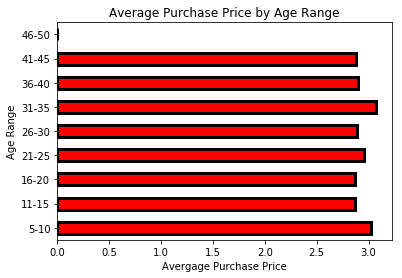

In [83]:
ax6 = plt.subplot()
age_range_avg_price.plot(kind='barh', legend=False, ax=ax6, color='r', edgecolor='k', linewidth=3)
ax6.set_xlabel('Avergage Purchase Price')
ax6.set_title('Average Purchase Price by Age Range')

# Total Purchase Value by Age Range:

In [25]:
age_range_sum = age_range_groupby.sum()
age_range_tot_value = age_range_sum['Price'].to_frame()
age_range_tot_value = age_range_tot_value.rename(index=str, columns={'Price':'Total Purchase Value'})
age_range_tot_value

,Total Purchase Value
Age Range,
5-10,96.62
11-15,224.15
16-20,528.74
21-25,902.61
26-30,219.82
31-35,178.26
36-40,127.49
41-45,8.64
46-50,0.00


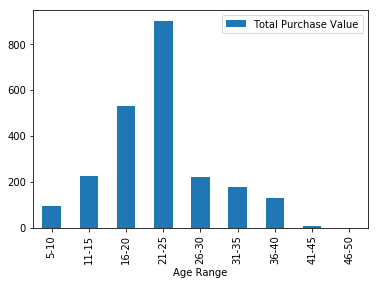

In [26]:
age_range_tot_value.plot.bar()

# Normalized Total Purchase Value by Age Range:

In [27]:
age_normalized_tot = age_range_tot_value.assign()
for i in range(len(labels)):
    age_normalized_tot.iloc[i,0] = age_normalized_tot.iloc[i,0] / age_range_purchase_count.iloc[i,0]
age_normalized_tot.rename(index=str, columns={'Total Purchase Value': 'Normalized Purchase Value'}, inplace=True)
age_normalized_tot

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,Normalized Purchase Value
Age Range,
5-10,3.019375
11-15,2.873718
16-20,2.873587
21-25,2.959377
26-30,2.892368
31-35,3.073448
36-40,2.897500
41-45,2.880000
46-50,NaN


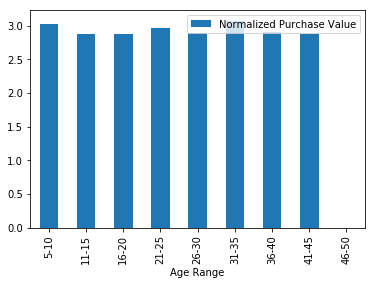

In [28]:
age_normalized_tot.plot.bar()

In [29]:


top_spenders = purchase_data_df.groupby('SN').sum().sort_values('Price', ascending=False)
top_spenders = top_spenders.iloc[0:5,2].to_frame().rename(index=str, columns={'Price': 'Total Purchase Value'})
top_spenders

,Total Purchase Value
SN,
Undirrala66,17.06
Saedue76,13.56
Mindimnya67,12.74
Haellysu29,12.73
Eoda93,11.58


In [30]:
top_spenders_index = list(top_spenders.index)
top_spenders_index

['Undirrala66', 'Saedue76', 'Mindimnya67', 'Haellysu29', 'Eoda93']

In [31]:
top_purchase_data_df = purchase_data_df.set_index('SN')
top_purchase_data_df = top_purchase_data_df.loc[top_spenders_index,:]
top_purchase_data_df = top_purchase_data_df.reset_index()
top_purchase_groupby = top_purchase_data_df.groupby('SN')

In [32]:
top_purchase_count =top_purchase_groupby.count()
top_purchase_item_count = top_purchase_count['Item ID'].to_frame()
top_purchase_item_count.rename(index=str, columns={'Item ID': 'Items Purchased'}, inplace=True)
top_purchase_item_count

,Items Purchased
SN,
Eoda93,3
Haellysu29,3
Mindimnya67,4
Saedue76,4
Undirrala66,5


In [33]:
top_purchase_avg =top_purchase_groupby.mean()
top_purchase_avg_price = top_purchase_avg['Price'].to_frame()
top_purchase_avg_price.rename(index=str, columns={'Price': 'Average Price Purchased'}, inplace=True)
top_purchase_avg_price

,Average Price Purchased
SN,
Eoda93,3.860000
Haellysu29,4.243333
Mindimnya67,3.185000
Saedue76,3.390000
Undirrala66,3.412000


In [34]:
top_purchase_sum =top_purchase_groupby.sum()
top_purchase_tot_price = top_purchase_sum['Price'].to_frame()
top_purchase_tot_price.rename(index=str, columns={'Price': 'Total Purchased Value'}, inplace=True)
top_purchase_tot_price

,Total Purchased Value
SN,
Eoda93,11.58
Haellysu29,12.73
Mindimnya67,12.74
Saedue76,13.56
Undirrala66,17.06


In [35]:
top_spenders_df = top_purchase_tot_price.reset_index().merge(top_purchase_avg_price.reset_index()).merge(top_purchase_item_count.reset_index())

In [36]:
top_spenders_df = top_spenders_df.sort_values('Total Purchased Value', ascending=False)
top_spenders_df

,SN,Total Purchased Value,Average Price Purchased,Items Purchased
4,Undirrala66,17.06,3.412000,5
3,Saedue76,13.56,3.390000,4
2,Mindimnya67,12.74,3.185000,4
1,Haellysu29,12.73,4.243333,3
0,Eoda93,11.58,3.860000,3


In [37]:
pop_products = purchase_data_df['Item ID'].value_counts()
pop_products = pop_products.iloc[0:5].to_frame()
pop_products_index = pop_products.index

In [38]:
purchase_data_ID = purchase_data_df.set_index('Item ID')
top_pop = purchase_data_ID.loc[pop_products_index,:]
top_name = top_pop['Item Name'].unique()
top_price = top_pop['Price'].unique()
top_products = pd.DataFrame({'Item ID': pop_products_index, 'Item Name': top_name, 'Price': top_price})
pop_products = pop_products.reset_index().rename(index=str, columns={'index': 'Item ID', 'Item ID': 'Item Count'})
top_products = top_products.merge(pop_products)

In [39]:
top_pop_group_sum = top_pop.groupby('Item Name').sum()
top_pop_tot_price = top_pop_group_sum['Price'].reset_index().rename(index=str, columns={'Price': 'Total Purchase Value'})
top_products = top_products.merge(top_pop_tot_price)
top_products

,Item ID,Item Name,Price,Item Count,Total Purchase Value
0,84,Arcane Gem,2.23,11,24.53
1,39,"Betrayal, Whisper of Grieving Widows",2.35,11,25.85
2,31,Trickster,2.07,9,18.63
3,34,Retribution Axe,4.14,9,37.26
4,175,Woeful Adamantite Claymore,1.24,9,11.16


Text(0.5,0,'Item Count')

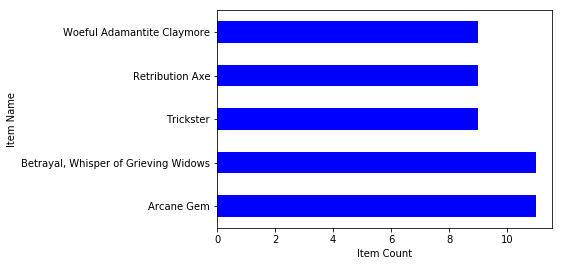

In [40]:
ax1 = plt.subplot()
top_products.plot(x='Item Name', y='Item Count', kind='barh', ax=ax1, legend=False, color='b')
ax1.set_xlabel('Item Count')

Text(0.5,0,'Price (Dollars)')

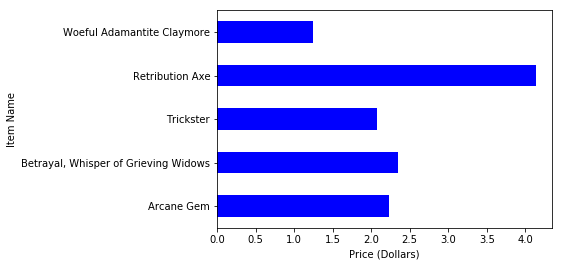

In [41]:
ax2 = plt.subplot()
top_products.plot(x='Item Name', y='Price', kind='barh', ax=ax2, legend=False, color='b')
ax2.set_xlabel('Price (Dollars)')

Text(0.5,1,'Total Purchase Value of 5 most Popular Items')

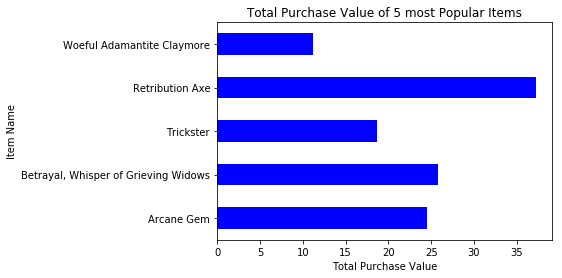

In [72]:
ax3 = plt.subplot()
top_products.plot(x='Item Name', y='Total Purchase Value', kind='barh', ax=ax3, legend=False, color='b')
ax3.set_xlabel('Total Purchase Value')
ax3.set_title('Total Purchase Value of 5 most Popular Items')